In [1]:
## Data description
### The xlsx file contained 2 importance sheets: conversation_1 and conversation_2

Each sheet has 7 columns:
    
    - 'customer'    : Text from customer 
    
        - note: the word "action_outside" declared customer had taken some action outside the Facebook messager (commented on the post,..) after that, the shop wrote some responses.
        
    - 'shop',       : Text from shop.
    
    - 'label',      : id of customer and name of shop.
    
    - 'fixed_time', : the date and time that the action is took place.
    
    - 'stl',        : aka (second to last), time in second between the current text and the text on the upper row.
    
    - 'str_ttl',    : same as above but in better format.
    
    - 'cat'         : label
        - cat == start_conversation : the moment started that conversation
        


SyntaxError: invalid syntax (<ipython-input-1-cfdd09b926a7>, line 4)

## Tasks

    - Performing data analysis:
        
        - Which information you can extract from that data ?
        
        - Show me the insight you can get in the way non-tech person can understand what you are doing.

    - Build a customer profile

**Note: Please write clean-clear code, comments on your code and also annotation on figures/charts (if any)!**

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

excel_file_path = 'conversations.xlsx'
xls = pd.ExcelFile(excel_file_path)

In [2]:
def plotWordFrequency(excel_file_path, sheet, column, plot_title, additional_unnecessary_words=None):
    if additional_unnecessary_words is None:
        additional_unnecessary_words = []

    # xls = pd.ExcelFile(excel_file_path)
    df = pd.read_excel(xls, sheet)
    df[column] = df[column].str.lower()
    word_count = df.customer.str.split(expand=True).stack().value_counts()

    # read stop words from file
    with io.open("vn_stopwords.txt", "r", encoding="utf-8") as my_file:
        vn_stopwords = my_file.read()
    vn_stopwords = vn_stopwords.splitlines()
    unnecessary_words = ['url', 'u', 'e', 'o', 'a', 'i', 'c', 'b', 'la', 'giup', 'oi', 'gui', 'nhg', 'chi', 'minh',
                         'shop',
                         'lam', 'tam', 'nhat', 'dung', 'mua', 'co', 'ko',
                         'a?',
                         'ko?', 'ok', '1', '2', '3', '4', 'dc', 'ạ?', ]
    all_stopwords = vn_stopwords + unnecessary_words + additional_unnecessary_words

    # remove stop word from word_count
    word_count = word_count.drop(all_stopwords, errors='ignore')
    word_count = word_count[word_count > 3]

    # word_count.hist()
    word_count.plot.barh()
    plt.suptitle(plot_title)
    plt.ylabel('Words')
    plt.yticks(fontsize=8)
    plt.xlabel('Frequency')
    plt.figure(figsize=(10, 100))
    plt.show()

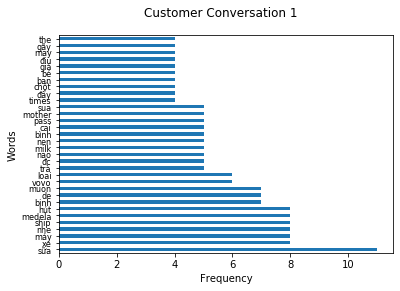

<Figure size 720x7200 with 0 Axes>

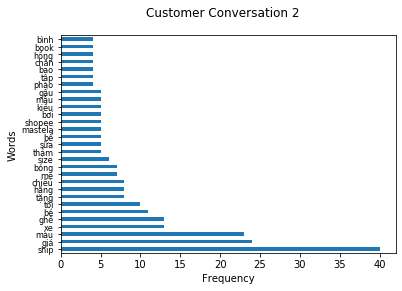

<Figure size 720x7200 with 0 Axes>

In [3]:
additional_unnecessary_words = ['action_outside', 't', 'có', 'nhé', 'ko', 'cho', 'ơi', 'mình', 'này', 'lấy', 'k', 'còn',
                                'bạn',
                                'bn', 'tớ', 'thanh', 'm', 'là', '.', 'ah', 'làng', 'dãy', 'đi', 'báo', 'máy', 'châu',
                                'giúp',
                                '15', 'ui', 'nhá', 'quây', 'j', 'x', 'bên', 'cái', 'ah', 'luôn', '2', 'nữa', 'số',
                                'ntnao',
                                'dchi', 'ơn', 'r', 'km', 'kia', 'trc', '1m32', 'pha', 'góc', 'í', '-', '?', 'sz', 'sợ',
                                'oki',
                                '0936875999', '+', 'hình', 'ck', 'alo', 'mấy', 'hộ', 'món', 'kệ', 'cảm', '&', 'ngô',
                                'bí',
                                'nhé.', 'hà', 'việt', 'đồ', 'âu', 'thước', '16a7', '1c', 'hả', 'kích']
#
plotWordFrequency('conversations.xlsx', '0', 'customer', 'Customer Conversation 1')
plotWordFrequency('conversations.xlsx', '1', 'customer', 'Customer Conversation 2', additional_unnecessary_words)

In [4]:
def calculateAverageWaitTime(sheet, max_time=9999999999):
    df = pd.read_excel(xls, sheet)

    customer_wait_time = df.loc[df['label'] == "Shop Gấu & Bí Ngô - Đồ dùng Mẹ & Bé cao cấp", 'stl']
    customer_wait_time = customer_wait_time[customer_wait_time <= max_time]
    average_wait_time = customer_wait_time.mean()
    average_wait_time = round(average_wait_time, 2)

    customer_wait_time_with_date = df.loc[
        df['label'] == "Shop Gấu & Bí Ngô - Đồ dùng Mẹ & Bé cao cấp", ['fixed_time', 'stl']]
    customer_wait_time_with_date = customer_wait_time_with_date[customer_wait_time_with_date['stl'] <= max_time]

    customer_wait_time_with_date.plot(x='fixed_time', y='stl')
    plt.xlabel('Date')
    plt.ylabel('Wait time (seconds)')
    plt.figtext(.45, .8, "Average Wait Time:" + str(average_wait_time) + "s")
    plt.show()  

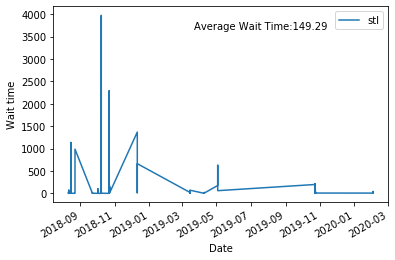

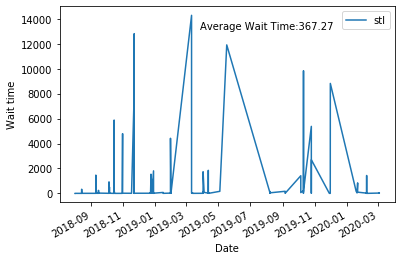

In [5]:
calculateAverageWaitTime('0', 3977)
calculateAverageWaitTime('1', 14291)